### (4) Time series, sequences and predictions

You need to understand how to solve time series and forecasting problems in TensorFlow.

You need to know how to:

❏ Train, tune and use time series, sequence and prediction models.

❏ Prepare data for time series learning.

❏ Understand Mean Average Error (MAE) and how it can be used to evaluate accuracy of
sequence models.

❏ Use RNNs and CNNs for time series, sequence and forecasting models.

❏ Identify when to use trailing versus centred windows.

❏ Use TensorFlow for forecasting.

❏ Prepare features and labels.

❏ Identify and compensate for sequence bias.

❏ Adjust the learning rate dynamically in time series, sequence and prediction models.

## Train, tune and use time series, sequence and prediction models.

In [1]:
import tensorflow as tf

C:\Users\pnkum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pnkum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pnkum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pnkum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
print(tf.__version__)

2.0.0-alpha0


In [3]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [4]:
csv_path = "C:\\Users\\pnkum\\Desktop\\visualization\\forSD.csv"

In [5]:
df = pd.read_csv(csv_path)

In [6]:
df.head(2)

,year,"Newfoundland and Labrador_Total, all industries_Both sees_15 to 24 years","Newfoundland and Labrador_Total, all industries_Both sees_25 to 54 years","Newfoundland and Labrador_Total, all industries_Both sees_55 years and over",Newfoundland and Labrador_Goods-producing sector_Both sees_15 to 24 years,Newfoundland and Labrador_Goods-producing sector_Both sees_25 to 54 years,Newfoundland and Labrador_Goods-producing sector_Both sees_55 years and over,Newfoundland and Labrador_Agriculture_Both sees_15 to 24 years,Newfoundland and Labrador_Agriculture_Both sees_25 to 54 years,Newfoundland and Labrador_Agriculture_Both sees_55 years and over,...,British Columbia_Accommodation and food services_Both sees_55 years and over,British Columbia_Other services (ecept public administration_Both sees_15 to 24 years,British Columbia_Other services (ecept public administration_Both sees_25 to 54 years,British Columbia_Other services (ecept public administration_Both sees_55 years and over,British Columbia_Public administration_Both sees_15 to 24 years,British Columbia_Public administration_Both sees_25 to 54 years,British Columbia_Public administration_Both sees_55 years and over,British Columbia_Unclassified industries_Both sees_15 to 24 years,British Columbia_Unclassified industries_Both sees_25 to 54 years,British Columbia_Unclassified industries_Both sees_55 years and over
0,Oct-14,29.5,163.2,46.4,6.1,42.4,10.1,NaN,0.7,0.8,...,17.9,16.3,64.0,25.4,2.0,75.5,15.7,..,..,..
1,Nov-14,29.9,163.0,44.6,4.3,38.7,10.8,NaN,NaN,0.9,...,15.4,18.1,68.7,22.2,1.6,77.5,20.1,..,..,..


In [7]:
df.shape

(65, 871)

In [8]:
df = df.dropna(axis='columns')

In [9]:
df.shape

(65, 709)

In [10]:
df = df.dropna()

In [11]:
df.shape

(65, 709)

In [12]:
df.tail(5)

,year,"Newfoundland and Labrador_Total, all industries_Both sees_15 to 24 years","Newfoundland and Labrador_Total, all industries_Both sees_25 to 54 years","Newfoundland and Labrador_Total, all industries_Both sees_55 years and over",Newfoundland and Labrador_Goods-producing sector_Both sees_15 to 24 years,Newfoundland and Labrador_Goods-producing sector_Both sees_25 to 54 years,Newfoundland and Labrador_Goods-producing sector_Both sees_55 years and over,"Newfoundland and Labrador_Forestry, fishing, mining, quarrying, oil and gas_Both sees_25 to 54 years","Newfoundland and Labrador_Forestry, fishing, mining, quarrying, oil and gas_Both sees_55 years and over","Newfoundland and Labrador_Mining, quarrying, and oil and gas etraction_Both sees_25 to 54 years",...,British Columbia_Accommodation and food services_Both sees_25 to 54 years,British Columbia_Accommodation and food services_Both sees_55 years and over,British Columbia_Other services (ecept public administration_Both sees_15 to 24 years,British Columbia_Other services (ecept public administration_Both sees_25 to 54 years,British Columbia_Other services (ecept public administration_Both sees_55 years and over,British Columbia_Public administration_Both sees_25 to 54 years,British Columbia_Public administration_Both sees_55 years and over,British Columbia_Unclassified industries_Both sees_15 to 24 years,British Columbia_Unclassified industries_Both sees_25 to 54 years,British Columbia_Unclassified industries_Both sees_55 years and over
60,Oct-19,25.4,150.1,53.7,1.4,33.9,13.7,9.3,5.0,7.1,...,96.3,24.8,11.5,74.5,26.3,92.4,29.3,..,..,..
61,Nov-19,25.7,148.2,50.3,1.4,31.3,12.1,8.8,3.4,6.9,...,93.2,21.8,10.9,77.7,28.6,89.0,26.4,..,..,..
62,Dec-19,25.4,143.0,48.4,1.5,27.1,11.8,7.8,2.6,6.2,...,96.5,25.0,12.3,71.6,30.1,83.5,27.3,..,..,..
63,Jan-20,22.3,143.5,46.7,1.0,26.1,10.1,8.2,2.5,6.6,...,95.3,24.2,11.6,73.2,31.2,81.8,27.0,..,..,..
64,Feb-20,23.9,144.5,45.4,0.8,27.1,10.1,9.4,2.7,8.0,...,95.0,24.1,10.4,77.9,28.0,81.0,28.2,..,..,..


In [35]:
df.to_csv('C:\\Users\\pnkum\Desktop\\Untitled Folder\\test.csv', index = False)

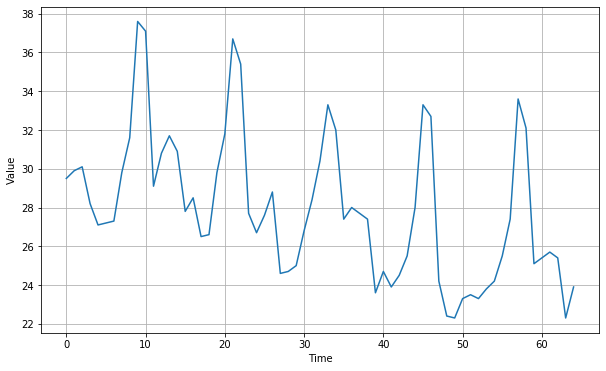

In [39]:
import csv
time_step = []
sunspots = []

with open('C:\\Users\\pnkum\Desktop\\Untitled Folder\\test.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

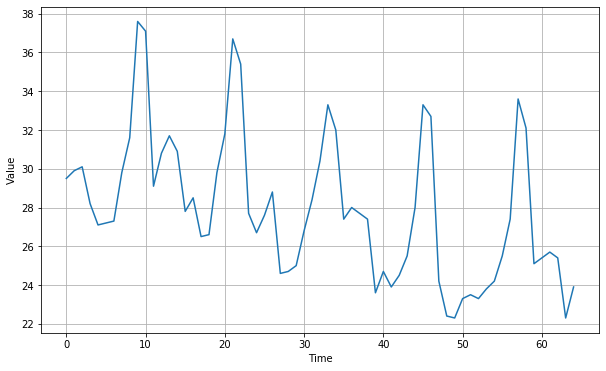

In [40]:
series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [52]:
split_time = 50
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 5
batch_size = 8
shuffle_buffer_size = 1000

In [51]:
x_valid

array([23.3, 23.5, 23.3, 23.8, 24.2, 25.5, 27.4, 33.6, 32.1, 25.1, 25.4,
       25.7, 25.4, 22.3, 23.9])

In [53]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [54]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [60]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 5
batch_size = 8
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)



<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(50,)


In [61]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [62]:

history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
6/6 [==============================] - 3s 450ms/step - loss: 14.1433 - mae: 14.5479
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 14.1013 - mae: 14.5185
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 14.0524 - mae: 14.4692
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 13.9901 - mae: 14.4071
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 13.9172 - mae: 14.3353
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 13.8348 - mae: 14.2541
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 13.7430 - mae: 14.1627
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 13.6413 - mae: 14.0606
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 13.5285 - mae: 13.9481
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 13.4031 - mae: 13.8224
Epoch 11/100
6/6 [==============================] - 0s 8m

6/6 [==============================] - 0s 9ms/step - loss: 37.5166 - mae: 40.0119
Epoch 89/100
6/6 [==============================] - 0s 7ms/step - loss: 28.1471 - mae: 28.8953
Epoch 90/100
6/6 [==============================] - 0s 8ms/step - loss: 21.8378 - mae: 22.4710
Epoch 91/100
6/6 [==============================] - 0s 9ms/step - loss: 26.0544 - mae: 26.8506
Epoch 92/100
6/6 [==============================] - 0s 8ms/step - loss: 28.9461 - mae: 28.4170
Epoch 93/100
6/6 [==============================] - 0s 9ms/step - loss: 33.2937 - mae: 34.7070
Epoch 94/100
6/6 [==============================] - 0s 9ms/step - loss: 36.4466 - mae: 35.5279
Epoch 95/100
6/6 [==============================] - 0s 9ms/step - loss: 42.0400 - mae: 43.5912
Epoch 96/100
6/6 [==============================] - 0s 9ms/step - loss: 46.0845 - mae: 45.0149
Epoch 97/100
6/6 [==============================] - 0s 9ms/step - loss: 52.9472 - mae: 54.4915
Epoch 98/100
6/6 [==============================] - 0s 9ms/step

[1e-08, 0.0001, 0, 60]

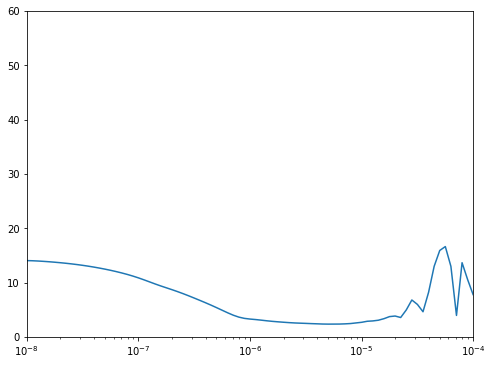

In [63]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [73]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=6, batch_size=10, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
5/5 [==============================] - 4s 704ms/step - loss: 19.8204 - mae: 20.7454
Epoch 2/500
5/5 [==============================] - 0s 9ms/step - loss: 9.5879 - mae: 10.4203
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 9.1673 - mae: 9.6287
Epoch 4/500
5/5 [==============================] - 0s 10ms/step - loss: 7.9064 - mae: 8.6283
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 5.7349 - mae: 6.2180
Epoch 6/500
5/5 [==============================] - 0s 11ms/step - loss: 5.5235 - mae: 6.0330
Epoch 7/500
5/5 [==============================] - 0s 10ms/step - loss: 4.4033 - mae: 4.9113
Epoch 8/500
5/5 [==============================] - 0s 11ms/step - loss: 4.0951 - mae: 4.6231
Epoch 9/500
5/5 [==============================] - 0s 10ms/step - loss: 3.7139 - mae: 4.2232
Epoch 10/500
5/5 [==============================] - 0s 10ms/step - loss: 3.4440 - mae: 3.9202
Epoch 11/500
5/5 [==============================] - 0s 10ms/step -

5/5 [==============================] - 0s 11ms/step - loss: 2.2262 - mae: 2.7544
Epoch 89/500
5/5 [==============================] - 0s 10ms/step - loss: 2.2236 - mae: 2.7521
Epoch 90/500
5/5 [==============================] - 0s 10ms/step - loss: 2.2210 - mae: 2.7498
Epoch 91/500
5/5 [==============================] - 0s 9ms/step - loss: 2.2184 - mae: 2.7475
Epoch 92/500
5/5 [==============================] - 0s 9ms/step - loss: 2.2157 - mae: 2.7452
Epoch 93/500
5/5 [==============================] - 0s 10ms/step - loss: 2.2132 - mae: 2.7430
Epoch 94/500
5/5 [==============================] - 0s 10ms/step - loss: 2.2108 - mae: 2.7408
Epoch 95/500
5/5 [==============================] - 0s 10ms/step - loss: 2.2084 - mae: 2.7385
Epoch 96/500
5/5 [==============================] - 0s 10ms/step - loss: 2.2059 - mae: 2.7361
Epoch 97/500
5/5 [==============================] - 0s 10ms/step - loss: 2.2031 - mae: 2.7336
Epoch 98/500
5/5 [==============================] - 0s 10ms/step - loss: 2.

5/5 [==============================] - 0s 11ms/step - loss: 2.0481 - mae: 2.5740
Epoch 175/500
5/5 [==============================] - 0s 11ms/step - loss: 2.0471 - mae: 2.5727
Epoch 176/500
5/5 [==============================] - 0s 10ms/step - loss: 2.0456 - mae: 2.5709
Epoch 177/500
5/5 [==============================] - 0s 10ms/step - loss: 2.0440 - mae: 2.5691
Epoch 178/500
5/5 [==============================] - 0s 10ms/step - loss: 2.0427 - mae: 2.5676
Epoch 179/500
5/5 [==============================] - 0s 10ms/step - loss: 2.0414 - mae: 2.5660
Epoch 180/500
5/5 [==============================] - 0s 11ms/step - loss: 2.0399 - mae: 2.5644
Epoch 181/500
5/5 [==============================] - 0s 10ms/step - loss: 2.0387 - mae: 2.5631
Epoch 182/500
5/5 [==============================] - 0s 10ms/step - loss: 2.0374 - mae: 2.5618
Epoch 183/500
5/5 [==============================] - 0s 10ms/step - loss: 2.0360 - mae: 2.5603
Epoch 184/500
5/5 [==============================] - 0s 11ms/ste

5/5 [==============================] - 0s 10ms/step - loss: 1.9631 - mae: 2.4779
Epoch 261/500
5/5 [==============================] - 0s 10ms/step - loss: 1.9622 - mae: 2.4769
Epoch 262/500
5/5 [==============================] - 0s 10ms/step - loss: 1.9611 - mae: 2.4760
Epoch 263/500
5/5 [==============================] - 0s 10ms/step - loss: 1.9608 - mae: 2.4758
Epoch 264/500
5/5 [==============================] - 0s 11ms/step - loss: 1.9600 - mae: 2.4747
Epoch 265/500
5/5 [==============================] - 0s 10ms/step - loss: 1.9590 - mae: 2.4737
Epoch 266/500
5/5 [==============================] - 0s 10ms/step - loss: 1.9585 - mae: 2.4732
Epoch 267/500
5/5 [==============================] - 0s 10ms/step - loss: 1.9575 - mae: 2.4722
Epoch 268/500
5/5 [==============================] - 0s 10ms/step - loss: 1.9570 - mae: 2.4716
Epoch 269/500
5/5 [==============================] - 0s 11ms/step - loss: 1.9561 - mae: 2.4704
Epoch 270/500
5/5 [==============================] - 0s 10ms/ste

5/5 [==============================] - 0s 10ms/step - loss: 1.9027 - mae: 2.4150
Epoch 347/500
5/5 [==============================] - 0s 9ms/step - loss: 1.9022 - mae: 2.4143
Epoch 348/500
5/5 [==============================] - 0s 11ms/step - loss: 1.9013 - mae: 2.4134
Epoch 349/500
5/5 [==============================] - 0s 11ms/step - loss: 1.9004 - mae: 2.4128
Epoch 350/500
5/5 [==============================] - 0s 11ms/step - loss: 1.9001 - mae: 2.4124
Epoch 351/500
5/5 [==============================] - 0s 11ms/step - loss: 1.8993 - mae: 2.4111
Epoch 352/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8985 - mae: 2.4107
Epoch 353/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8983 - mae: 2.4102
Epoch 354/500
5/5 [==============================] - 0s 11ms/step - loss: 1.8973 - mae: 2.4091
Epoch 355/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8965 - mae: 2.4085
Epoch 356/500
5/5 [==============================] - 0s 10ms/step

5/5 [==============================] - 0s 10ms/step - loss: 1.8467 - mae: 2.3584
Epoch 433/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8458 - mae: 2.3573
Epoch 434/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8450 - mae: 2.3568
Epoch 435/500
5/5 [==============================] - 0s 9ms/step - loss: 1.8444 - mae: 2.3561
Epoch 436/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8438 - mae: 2.3555
Epoch 437/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8431 - mae: 2.3547
Epoch 438/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8423 - mae: 2.3540
Epoch 439/500
5/5 [==============================] - 0s 9ms/step - loss: 1.8420 - mae: 2.3536
Epoch 440/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8412 - mae: 2.3525
Epoch 441/500
5/5 [==============================] - 0s 10ms/step - loss: 1.8403 - mae: 2.3520
Epoch 442/500
5/5 [==============================] - 0s 9ms/step -

In [66]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

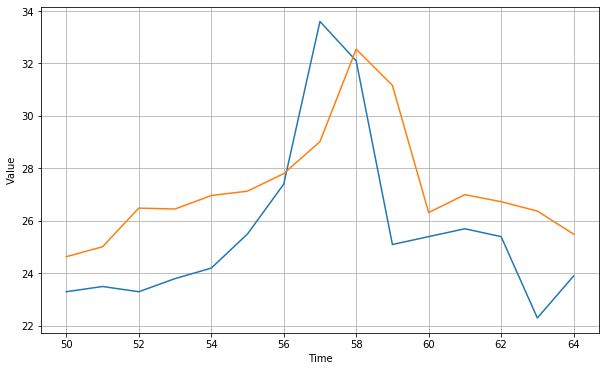

In [67]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [68]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

2.2529516

<Figure size 576x432 with 0 Axes>

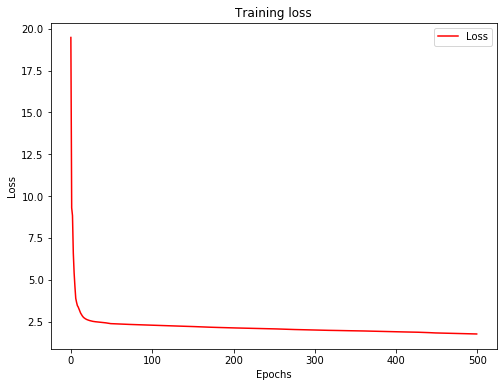

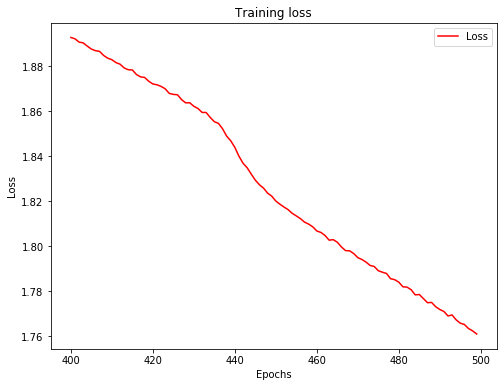

<Figure size 576x432 with 0 Axes>

In [72]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()



zoomed_loss = loss[400:]
zoomed_epochs = range(400,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [29]:
value = df['year']
year = df['Newfoundland and Labrador_Total, all industries_Both sees_15 to 24 years']

In [34]:
value = []
year = []

for row in df:
  value.append((row[2]))
  year.append((row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)



NameError: name 'sunspots' is not defined

In [13]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [14]:
TRAIN_SPLIT = 50

In [15]:
tf.random.set_seed(13)

In [16]:
uni_data = df['Newfoundland and Labrador_Total, all industries_Both sees_15 to 24 years']
uni_data.index = df['year']
uni_data.head()

year
Oct-14    29.5
Nov-14    29.9
Dec-14    30.1
Jan-15    28.2
Feb-15    27.1
Name: Newfoundland and Labrador_Total, all industries_Both sees_15 to 24 years, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D29E1CAC8>],
      dtype=object)

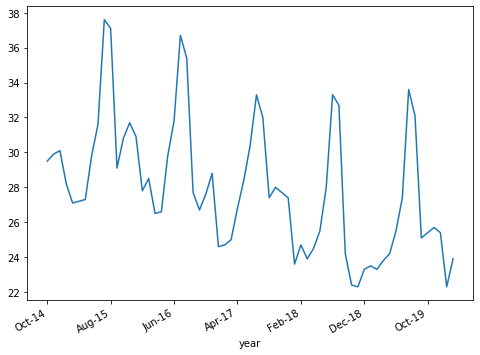

In [17]:
uni_data.plot(subplots=True)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [27]:
uni_data


year
Oct-14    29.5
Nov-14    29.9
Dec-14    30.1
Jan-15    28.2
Feb-15    27.1
          ... 
Oct-19    25.4
Nov-19    25.7
Dec-19    25.4
Jan-20    22.3
Feb-20    23.9
Name: Newfoundland and Labrador_Total, all industries_Both sees_15 to 24 years, Length: 65, dtype: float64